## Beer DataSet

In [1]:

# Importing library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.decomposition import PCA


<img src='./imgs/exe21.png' style=''>
<img src='./imgs/exe22.png' style=''>
<img src='./imgs/exe23.png' style=''>
<img src='./imgs/exe24.png' style=''>
<img src='./imgs/exe25.png' style=''>
<img src='./imgs/exe26.png' style=''>
<img src='./imgs/exe27.png' style=''>
<img src='./imgs/exe28.png' style=''>
<img src='./imgs/exe29.png' style=''>

In [2]:

# Importing data
data = pd.read_csv('./data/beer.txt', sep=' ')

## Fast look to data

In [3]:
data.head()

COST  SIZE  ALCOHOL  REPUTAT  COLOR  AROMA  TASTE  SES  GROUP
0    90    80       70       20     50   70.0     60    2      1
1    75    95      100       50     55   40.0     65    1      1
2    10    15       20       85     40   30.0     50    4      2
3   100    70       50       30     75   60.0     80    3      2
4    20    10       25       35     30   35.0     45    4      1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COST     231 non-null    int64  
 1   SIZE     231 non-null    int64  
 2   ALCOHOL  231 non-null    int64  
 3   REPUTAT  231 non-null    int64  
 4   COLOR    231 non-null    int64  
 5   AROMA    220 non-null    float64
 6   TASTE    231 non-null    int64  
 7   SES      231 non-null    int64  
 8   GROUP    231 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 16.4 KB


In [5]:

#sns.set()
#sns.pairplot(data)
#plt.show()


In [6]:
data2 = data.iloc[:,0:7] # Getting only the 7 quality features

In [7]:
data2.head()

COST  SIZE  ALCOHOL  REPUTAT  COLOR  AROMA  TASTE
0    90    80       70       20     50   70.0     60
1    75    95      100       50     55   40.0     65
2    10    15       20       85     40   30.0     50
3   100    70       50       30     75   60.0     80
4    20    10       25       35     30   35.0     45

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COST     231 non-null    int64  
 1   SIZE     231 non-null    int64  
 2   ALCOHOL  231 non-null    int64  
 3   REPUTAT  231 non-null    int64  
 4   COLOR    231 non-null    int64  
 5   AROMA    220 non-null    float64
 6   TASTE    231 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 12.8 KB


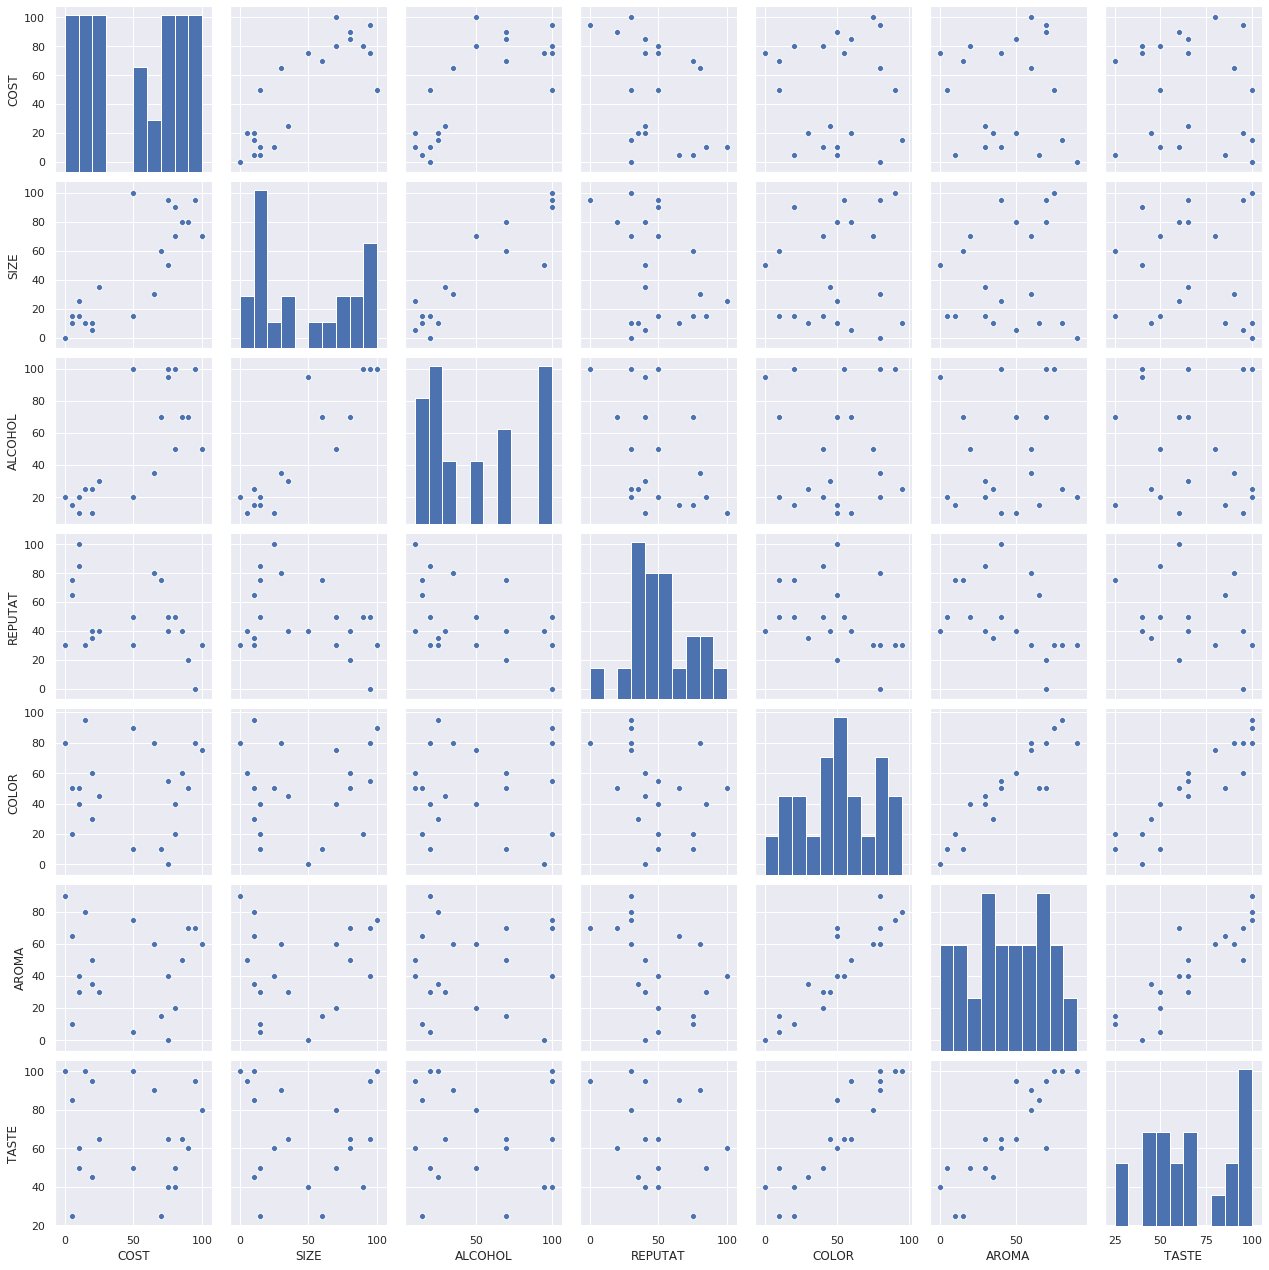

In [9]:

sns.set()
sns.pairplot(data2)
plt.show()

In [10]:
dataBeer = data2.dropna() # eliminando as linhas com valores NA

In [11]:
dataBeer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 229
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COST     220 non-null    int64  
 1   SIZE     220 non-null    int64  
 2   ALCOHOL  220 non-null    int64  
 3   REPUTAT  220 non-null    int64  
 4   COLOR    220 non-null    int64  
 5   AROMA    220 non-null    float64
 6   TASTE    220 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 13.8 KB


In [12]:

matCov = np.cov(dataBeer.T)
matCorr = np.corrcoef(dataBeer.T)

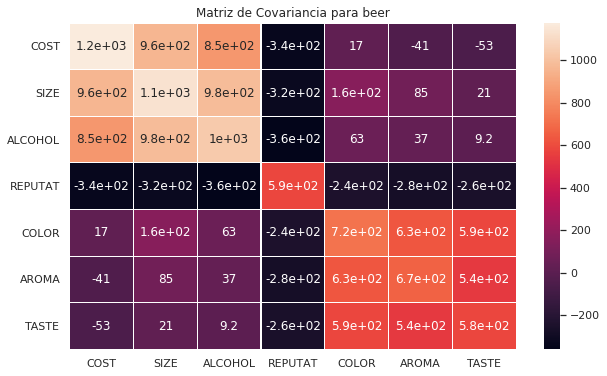

In [13]:

fig = plt.figure(figsize=(10,6))
axe = sns.heatmap(matCov, annot=True, linewidth=0.1, xticklabels=dataBeer.columns, yticklabels=dataBeer.columns )
axe.set_title('Matriz de Covariancia para beer')
plt.show()

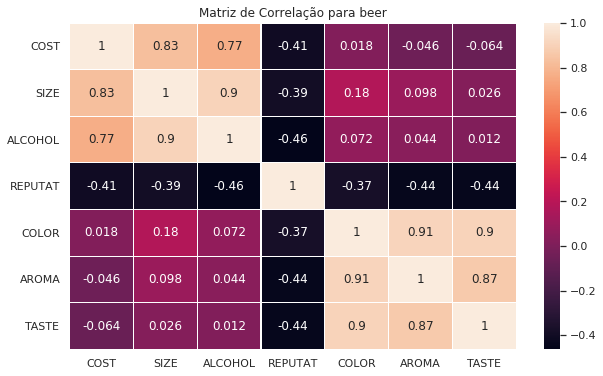

In [14]:

fig = plt.figure(figsize=(10,6))
axe = sns.heatmap(matCorr, annot=True, linewidth=0.1, xticklabels=dataBeer.columns, yticklabels=dataBeer.columns )
axe.set_title('Matriz de Correlação para beer')
plt.show()

In [15]:

autoVal, autoVet = np.linalg.eig(matCov)

print('Auto valores associados a matriz de covariância:\n', autoVal); print('\n')
print('Auto vetores associados a matriz de covariância:\n', autoVet.T) # .T aqui foi para meio que reverter o .T ao se calcular a matriz de covariancia acima

Auto valores associados a matriz de covariância:
 [3153.94570475 1924.88341739  367.94620068  267.45828889   29.15758869
   95.05990089   69.65392153]


Auto vetores associados a matriz de covariância:
 [[ 0.54635061  0.57392846  0.53350251 -0.24598171  0.11971947  0.09071797
   0.0664282 ]
 [-0.18490207 -0.08254619 -0.10998646 -0.22119981  0.5678638   0.55375799
   0.51851111]
 [-0.04648019  0.33257803  0.01841879  0.88957041  0.29772339  0.08301771
   0.00505164]
 [-0.77610827  0.18476541  0.5841612  -0.08795166 -0.10330327  0.01229602
  -0.06095191]
 [-0.06416993  0.38326503 -0.26728556  0.06231067 -0.6769325   0.21640865
   0.51826213]
 [-0.161188    0.4811923  -0.45702058 -0.23288917  0.08273793  0.31927235
  -0.60875842]
 [ 0.18085473 -0.37497697  0.28528075  0.18268182 -0.31433103  0.72753809
  -0.28950029]]


In [16]:

# Padronizando dado de Beer

def standardizeDataFrame(X):
    '''
    Standardize Pandas DataFrame X
    
    :param X: DataFrame
    :return X_pad, X standardized
    '''
    X_pad = pd.DataFrame() # X padronizado: (x - mean)/std
    
    for col in range(len(X.columns)):
        pad = X.iloc[:,col]
        mean = pad.mean()
        std = pad.std()

        newCol = []

        for val in pad:
            new_value = (val - mean)/std
            newCol.append(new_value)

        df = pd.DataFrame(newCol, columns=[X.columns[col]])

        X_pad = pd.concat([X_pad, df], axis=1)
    return X_pad

dataBeer_pad = standardizeDataFrame(dataBeer)

In [17]:
dataBeer_pad.head()

COST      SIZE   ALCOHOL   REPUTAT     COLOR     AROMA     TASTE
0  1.247664  1.082023  0.728712 -1.167146 -0.037209  0.977891 -0.300695
1  0.809887  1.526690  1.658983  0.072301  0.148835 -0.183960 -0.093319
2 -1.087146 -0.844867 -0.821739  1.518322 -0.409297 -0.571243 -0.715447
3  1.539515  0.785578  0.108532 -0.753997  0.893012  0.590607  0.528809
4 -0.795295 -0.993090 -0.666694 -0.547422 -0.781386 -0.377601 -0.922824

In [18]:

# Applying PCA

pca = PCA(n_components=7)
pca.fit(dataBeer)

dataBeer_pca = pca.transform(dataBeer)

In [19]:

pca.components_

array([[ 0.54635061,  0.57392846,  0.53350251, -0.24598171,  0.11971947,
         0.09071797,  0.0664282 ],
       [-0.18490207, -0.08254619, -0.10998646, -0.22119981,  0.5678638 ,
         0.55375799,  0.51851111],
       [-0.04648019,  0.33257803,  0.01841879,  0.88957041,  0.29772339,
         0.08301771,  0.00505164],
       [-0.77610827,  0.18476541,  0.5841612 , -0.08795166, -0.10330327,
         0.01229602, -0.06095191],
       [ 0.161188  , -0.4811923 ,  0.45702058,  0.23288917, -0.08273793,
        -0.31927235,  0.60875842],
       [ 0.18085473, -0.37497697,  0.28528075,  0.18268182, -0.31433103,
         0.72753809, -0.28950029],
       [-0.06416993,  0.38326503, -0.26728556,  0.06231067, -0.6769325 ,
         0.21640865,  0.51826213]])

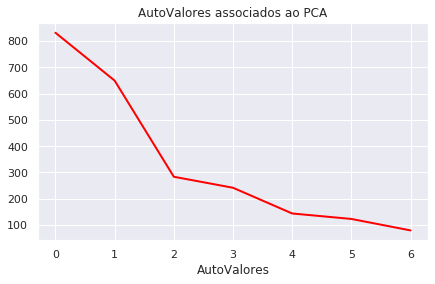

In [20]:

fig, axe = plt.subplots(figsize=(7,4))
axe.plot(pca.singular_values_, lw=2, color='red')
axe.set_xlabel('AutoValores')
axe.set_title('AutoValores associados ao PCA')
plt.show()

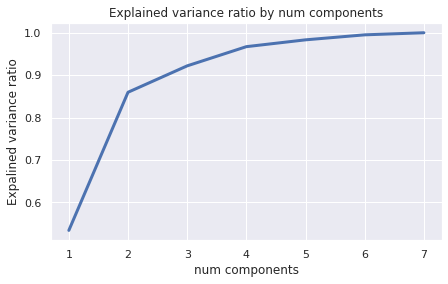

In [21]:

fig, axe = plt.subplots(figsize=(7,4))
axe.plot(np.arange(1,8), np.cumsum(pca.explained_variance_ratio_), lw=3)
axe.set_xlabel('num components')
axe.set_ylabel('Expalined variance ratio')
axe.set_title('Explained variance ratio by num components')
plt.show()

Um detalhe, observe que o quadrado do desvio padrão dos novos dados gerados com PCA, n_components = 7, equivale aos autovalores que calculamos acima usando numpy, como mostrado no problema proposto.

In [22]:
DFdataBeer_pca = pd.DataFrame(dataBeer_pca); DFdataBeer_pca.std()**2

0    3153.945705
1    1924.883417
2     367.946201
3     267.458289
4      95.059901
5      69.653922
6      29.157589
dtype: float64

## Ainda não finalizado

In [23]:
#help(PCA)

## References

[1]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/LivroDeExerciciosFECD.pdf
<br>
[2]https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
<br>
[3]https://homepages.dcc.ufmg.br/%7Eassuncao/EstatCC/FECD.pdf
Cap. Análise de componentes principais e fatorial